In [30]:
import statsmodels.api as sm

In [22]:
dat = pd.read_csv('./Como_SCEUA_29.csv')
obs = (pd.read_pickle('/RHESSys/Como/obs/como_q_obs.pcl')['2004-10-01':'2007-09-30']).discharge.as_matrix()

In [23]:
dat.sort_values('like1',ascending=False,inplace=True)

In [24]:
dat = dat.iloc[1,8:-1].as_matrix()

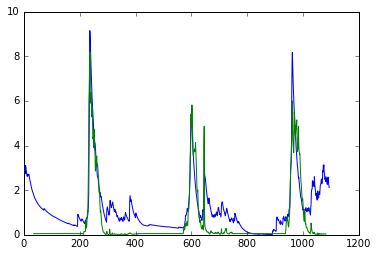

In [29]:
plt.plot(dat);
plt.plot(obs);

In [33]:
df = pd.DataFrame()
df['obs'] = obs
df['sim'] = dat

In [34]:
df.dropna(inplace=True)

In [35]:
mod = sm.formula.ols('obs ~ sim',df).fit()

In [36]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2760.
Date:                Fri, 22 Sep 2017   Prob (F-statistic):          1.24e-295
Time:                        08:40:43   Log-Likelihood:                -1106.0
No. Observations:                1048   AIC:                             2216.
Df Residuals:                    1046   BIC:                             2226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4408      0.029    -15.347      0.000        -0.497    -0.384
sim            0.8832      0.017     52.535      0.000         0.850     0.916
==============================================================================
Omnibus:                      191.878   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.843
Skew:                           0.767   Prob(JB):                    7.32e-198
Kurtosis:                       7.294   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 1)

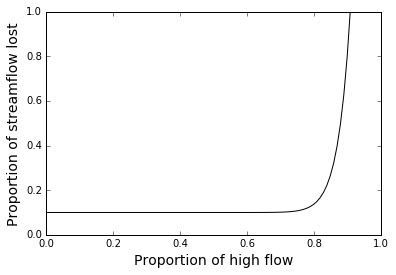

In [246]:
# define a function that increases the leakage as flow increases
def leakage(x,a,b,c): return a*(x**b) + c

x = np.linspace(0,1,100,endpoint=True)
y = leakage(x,10,25,0.1)

plt.plot(x,y,'-k')
plt.xlabel('Proportion of high flow', fontsize = 14)
plt.ylabel('Proportion of streamflow lost',fontsize = 14)
plt.ylim(0,1)

(0, 1)

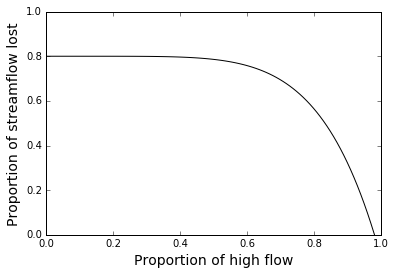

In [229]:
def apply_leakage(sim,a,b,c):
    
    propHighFlow = sim/np.max(sim) # compute proportion of max flow
    
    loss = leakage(propHighFlow,a,b,c) # compute leakage propotion based on equation and proportion of high flow
    
    leak = sim*loss # compute leakage at each timestep
    newsim = sim-leak # compute the new flow by subtracting the leakage from the original flow
    
        
    x = np.linspace(0,1,100,endpoint=True)
    y = leakage(x,a,b,c)
    
    plt.figure(figsize=(8,5))
    plt.plot(x,y,'-k')
    plt.xlabel('Proportion of high flow', fontsize = 14)
    plt.ylabel('Proportion of streamflow lost',fontsize = 14)
    plt.ylim(0,1)
    
    return newsim,leak

In [230]:
# -5 < a < 5
# 0 < b < 5
# 0 < c < 1
# 

a: -2
b: 5
c: 0.6
Total Leakage: 577.9 mm


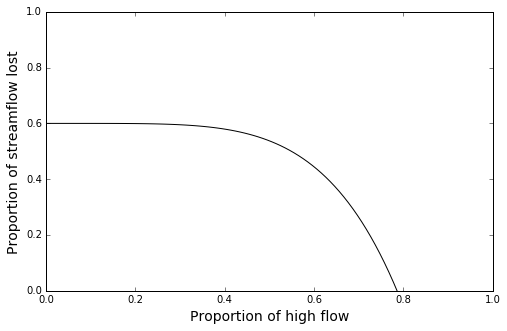

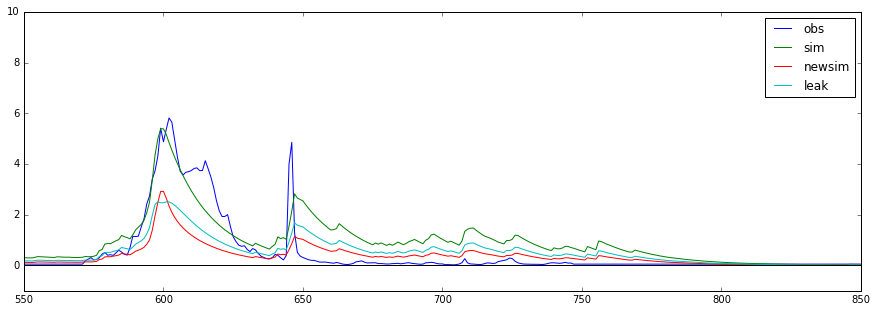

In [231]:
a = -2
b = 5
c = 0.6

res = apply_leakage(df.sim.as_matrix(),a,b,c)
newsim,leak = res
df['newsim'] = newsim
df['leak'] = leak

df.plot(figsize=(15,5))
plt.xlim(550,850)
plt.ylim(-1,10)
plt.axhline(0,color='k')

print 'a: %s'%a
print 'b: %s'%b
print 'c: %s'%c
print 'Total Leakage: %.1f mm'%df.leak.sum()

a: 0.4
b: 2.5
c: 0.1
Total Leakage: 171.7 mm


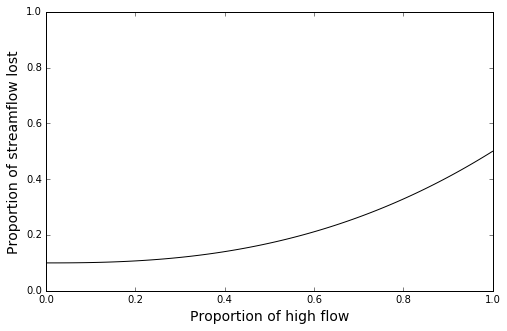

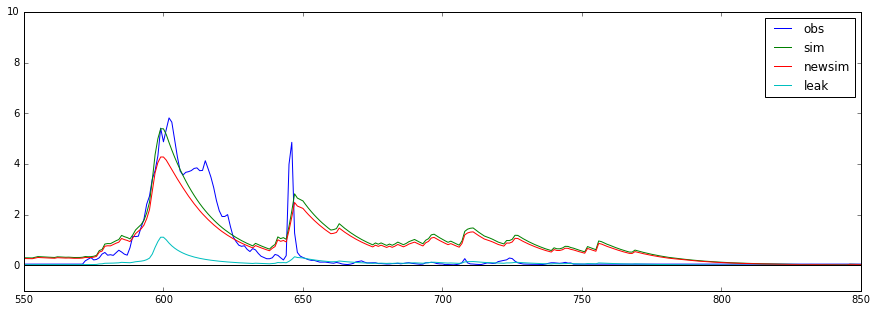

In [219]:
a = 0.4
b = 2.5
c = 0.1

res = apply_leakage(df.sim.as_matrix(),a,b,c)
newsim,leak = res
df['newsim'] = newsim
df['leak'] = leak

df.plot(figsize=(15,5))
plt.xlim(550,850)
plt.ylim(-1,10)
plt.axhline(0,color='k')

print 'a: %s'%a
print 'b: %s'%b
print 'c: %s'%c
print 'Total Leakage: %.1f mm'%df.leak.sum()